In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

df=pd.read_csv("black-friday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [18]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [17]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [19]:
df.drop(columns=['Product_Category_2', 'Product_Category_3'], inplace=True)


In [20]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [21]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

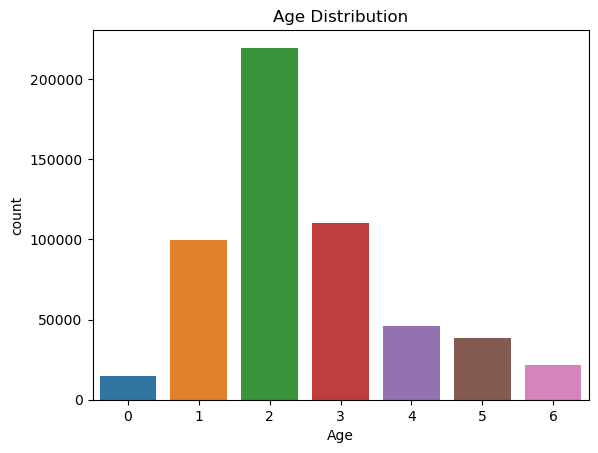

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
sns.countplot(x='Age', data=df)
plt.title('Age Distribution')
plt.show()


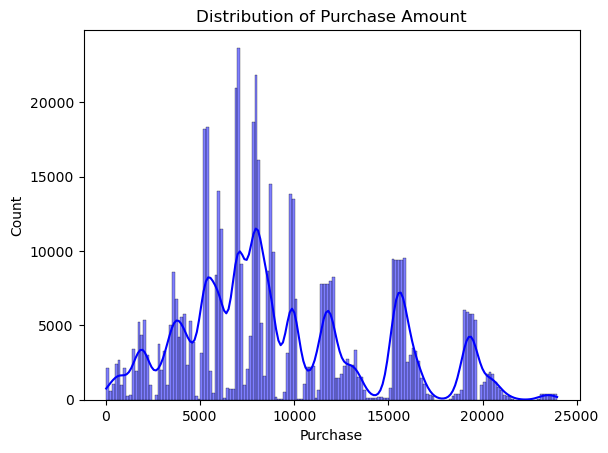

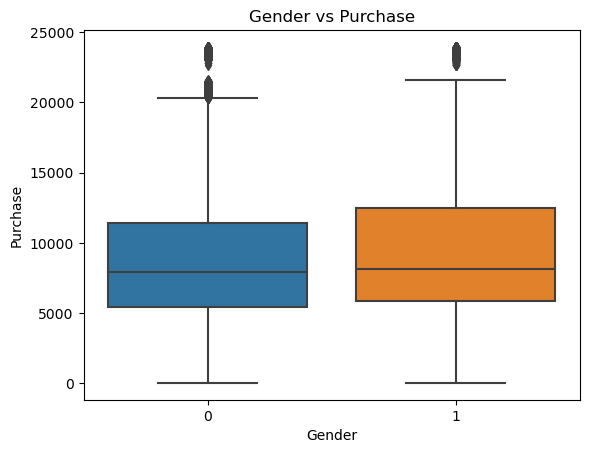

In [36]:
# Distribution of 'Purchase'
sns.histplot(df['Purchase'], kde=True, color='blue')
plt.title('Distribution of Purchase Amount')
plt.show()

# Gender vs Purchase Amount
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title('Gender vs Purchase')
plt.show()

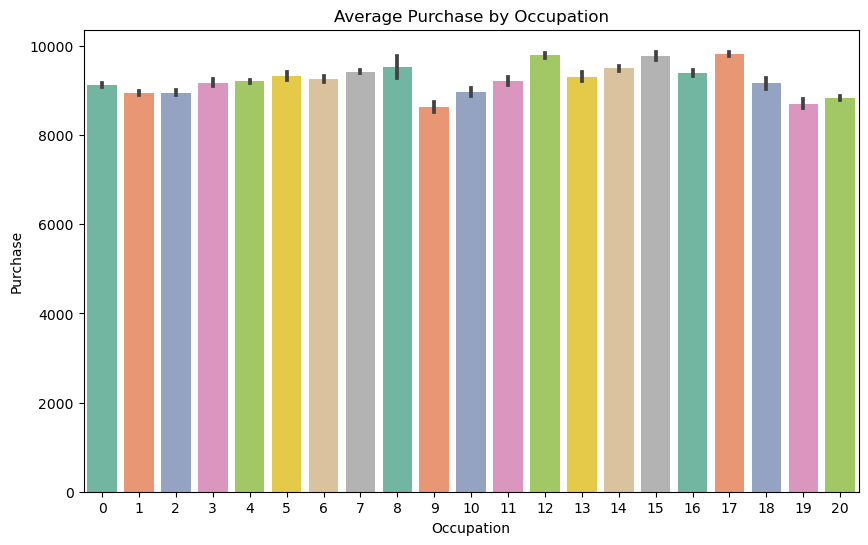

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation', y='Purchase', data=df, palette="Set2")
plt.title("Average Purchase by Occupation")
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Product_ID'] = label_encoder.fit_transform(df['Product_ID'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['City_Category'] = label_encoder.fit_transform(df['City_Category'])
df['Stay_In_Current_City_Years'] = label_encoder.fit_transform(df['Stay_In_Current_City_Years'])


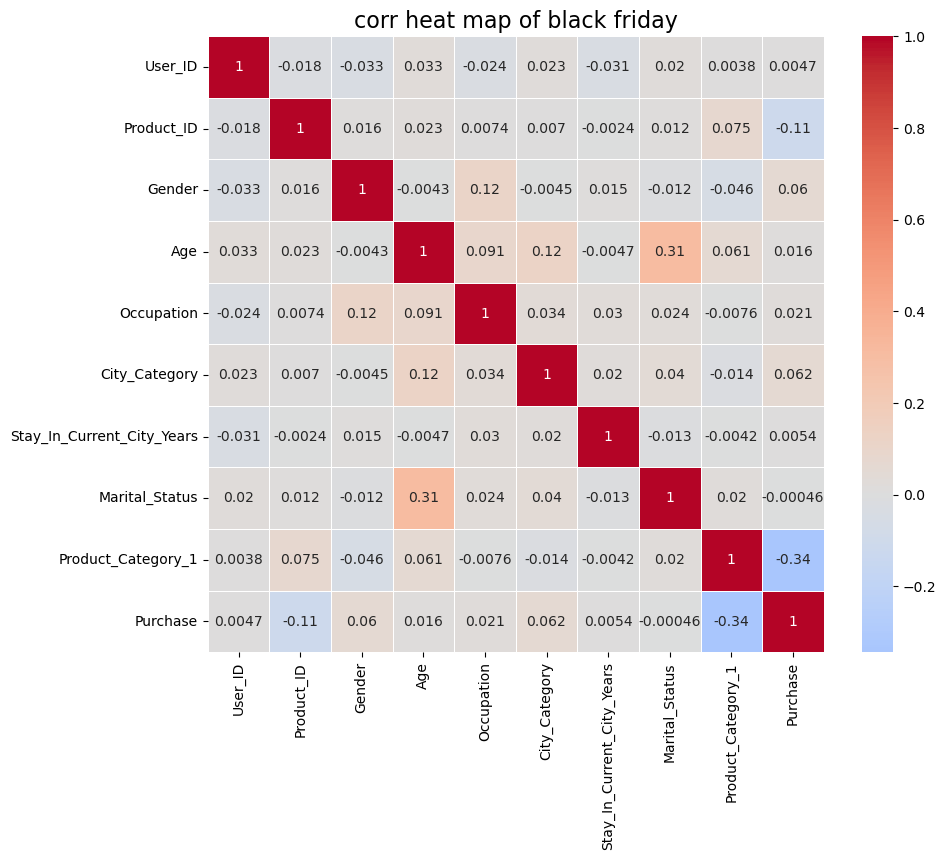

In [26]:
corr_martrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_martrix,annot=True,cmap='coolwarm',center=0,square=True,linewidth=0.5)
plt.title("corr heat map of black friday",fontsize=16)
plt.show()

In [32]:
# Features and target variable
X = data.drop(['Purchase'], axis=1)
y = data['Purchase']


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Regression Equation: Purchase = {slope:.2f} * Occupation + {intercept:.2f}")



Linear Regression Equation: Purchase = 16.04 * Occupation + 9134.39


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# R^2 Score for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression R^2 Score: {r2_lr}')


Linear Regression R^2 Score: 0.0004671846557150472


In [46]:
# Multiple Linear Regression Model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Predictions
y_pred_mlr = mlr.predict(X_test)

# R^2 Score for Multiple Linear Regression
r2_mlr = r2_score(y_test, y_pred_mlr)
print(f'Multiple Linear Regression R^2 Score: {r2_mlr}')


Multiple Linear Regression R^2 Score: 0.0004671846557150472


In [47]:
from sklearn.linear_model import Ridge

# Ridge Regression Model
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test)

# R^2 Score for Ridge Regression
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression R^2 Score: {r2_ridge}')


Ridge Regression R^2 Score: 0.0004671846531668633


In [48]:
from sklearn.linear_model import Lasso

# Lasso Regression Model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test)

# R^2 Score for Lasso Regression
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression R^2 Score: {r2_lasso}')


Lasso Regression R^2 Score: 0.00046717757874636945


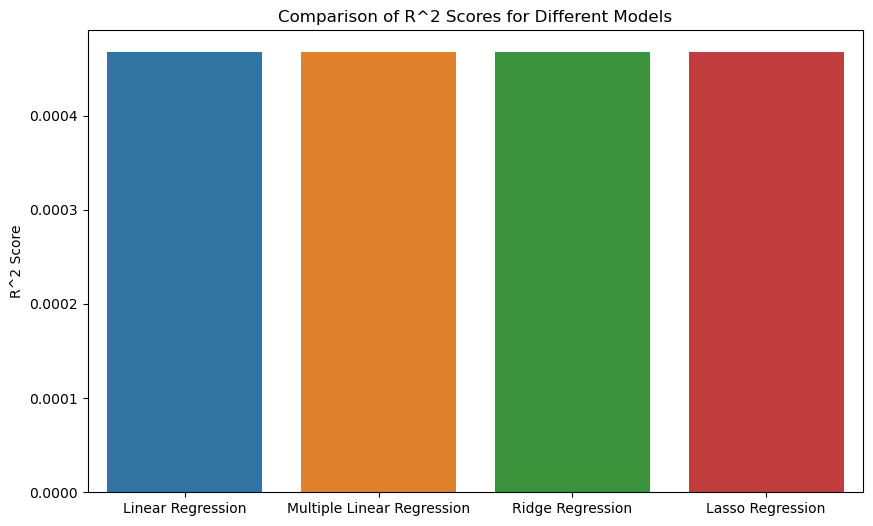

In [49]:
# Comparing R^2 scores of the models
models = ['Linear Regression', 'Multiple Linear Regression', 'Ridge Regression', 'Lasso Regression']
r2_scores = [r2_lr, r2_mlr, r2_ridge, r2_lasso]

plt.figure(figsize=(10,6))
sns.barplot(x=models, y=r2_scores)
plt.title('Comparison of R^2 Scores for Different Models')
plt.ylabel('R^2 Score')
plt.show()
